In [1]:
# Kredi kartı başvurusu yapan müşterilerden arasında sahtekarlık tespiti yapıcaz

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:,:-1].values # tüm satırlar sonuncu haric
y = dataset.iloc[:,-1].values #sadece sonuncu sütun

#veride A1 den A14 e kadar müşteri bilgileri var fakat bu bilgiler gizlilik amaçlı A harfi ile verilmişlerdir
#Class sütununda 0 application onaylanmadı 1 ise onaylandı demek

In [7]:
#Feature SCALİNG
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X) #0 - 1 ARASI SIKIŞTIRDIK VERİLERİ

In [9]:
#Training the SOM
from minisom import MiniSom
# 10X10 grid genişliğinde seçtik haritayıi 15 feature,customer id kim cheater diye tuttuk
#sigma radius of grid
# her iterasyondaki ağırlık güncelleme oranı
som = MiniSom(x = 10, y= 10, input_len= 15, sigma = 1.0, learning_rate= 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration=100)

In [10]:
#visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

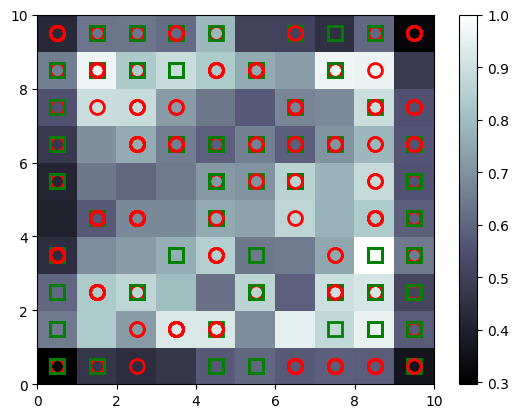

In [11]:
bone() #ekran oluşturucak harita için
pcolor(som.distance_map().T) # Mean Interneuron Distance haritasını verir
colorbar() # beyaz ve siyah range'ini verir beyazlar large MIDs yani autliners siyahlar Lowest MIDs
markers = ['o', 's'] #kırmızı daireler onaylanmaya müşteriler, yeşiller onaylanan müşteriler
colors = ['r', 'g'] #markerlerin renkleri red green
for i, x in enumerate(X): #şimdi tüm müşterileri işaretliyoruz i index x vektör
    w = som.winner(x) # ilk müşterinin kazanan düğümü
    #markerliyoruz müşteriyi karelerin ortasına olacak şekilde
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]], #müşterinin onaylanmış olması veya onaylanmamasına göre işerati koyuyoruz
         markeredgecolor = colors[y[i]], #rengini belirliyoruz
         markerfacecolor = 'None',
         markersize = 10, #marker size'i
         markeredgewidth = 2) #genişliği
show()

In [15]:
#finding the frauds
mappings = som.win_map(X) # bu bize 10x10 grid içerisinde herhangi kordinada karşılık gelen müşterileri verir
frauds = np.concatenate((mappings[(1,8)], mappings[(7,8)], mappings[(8,3)],mappings[(8,8)],mappings[(7,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)
len(frauds)

49

In [17]:
for i in frauds[:, 0]:
  print(int(i))

15739548
15699839
15705918
15672894
15783883
15756538
15801473
15728523
15675926
15794204
15734008
15757434
15769548
15593834
15673907
15737909
15660528
15779207
15609987
15752578
15666096
15609758
15611682
15618258
15805261
15585855
15661412
15799785
15591360
15589881
15671293
15602456
15580579
15568819
15687688
15621244
15720725
15591035
15572361
15605872
15585855
15661412
15799785
15591360
15589881
15671293
15602456
15580579
15568819
